In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importamos las librerías con las que trabajaremos de ahora en más.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [4]:
df_players = pd.read_excel('/content/drive/MyDrive/Datos/IAA/df_players.xlsx')
df_players.head()

,Jugador,Equipo,Equipo durante el período seleccionado,Posición específica,Edad,Valor de mercado (Transfermarkt),Vencimiento contrato,Partidos jugados,Minutos jugados,Goles,...,Goles evitados/90,Pases hacía atrás recibidos del arquero/90,Salidas/90,Duelos aéreos en los 90.1,Tiros libres/90,Tiros libres directos/90,"Tiros libres directos, %",Córneres/90,Penaltis a favor,"Penaltis realizados, %"
0,A. Moris,Union Saint-Gilloise,Union Saint-Gilloise,GK,34,0,2026-06-30,58,5752,0,...,-0.057,0.00,1.00,0.38,NaN,NaN,NaN,0.00,0,0.0
1,M. Vandevoordt,Genk,Genk,GK,22,0,2026-06-30,56,5663,0,...,0.171,0.00,1.24,0.27,NaN,NaN,NaN,0.00,0,0.0
2,Luís Maximiano,Almería,Almería,GK,25,8000000,2027-06-30,32,3232,0,...,0.054,0.00,1.06,0.17,NaN,NaN,NaN,0.00,0,0.0
3,B. Mechele,Club Brugge,Club Brugge,"LCB, RCB",31,5000000,2025-06-30,58,5589,6,...,NaN,2.27,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
4,H. Vanaken,Club Brugge,Club Brugge,"AMF, LCMF",31,0,2027-06-30,56,5456,11,...,NaN,0.54,NaN,NaN,0.15,0.13,25.0,0.02,1,100.0


In [5]:
df_players = pd.read_excel('/content/df_players.xlsx')
df_players.head()

,Jugador,Equipo,Equipo durante el período seleccionado,Posición específica,Edad,Valor de mercado (Transfermarkt),Vencimiento contrato,Partidos jugados,Minutos jugados,Goles,...,Goles evitados/90,Pases hacía atrás recibidos del arquero/90,Salidas/90,Duelos aéreos en los 90.1,Tiros libres/90,Tiros libres directos/90,"Tiros libres directos, %",Córneres/90,Penaltis a favor,"Penaltis realizados, %"
0,A. Moris,Union Saint-Gilloise,Union Saint-Gilloise,GK,34,0,2026-06-30,58,5752,0,...,-0.057,0.00,1.00,0.38,NaN,NaN,NaN,0.00,0,0.0
1,M. Vandevoordt,Genk,Genk,GK,22,0,2026-06-30,56,5663,0,...,0.171,0.00,1.24,0.27,NaN,NaN,NaN,0.00,0,0.0
2,Luís Maximiano,Almería,Almería,GK,25,8000000,2027-06-30,32,3232,0,...,0.054,0.00,1.06,0.17,NaN,NaN,NaN,0.00,0,0.0
3,B. Mechele,Club Brugge,Club Brugge,"LCB, RCB",31,5000000,2025-06-30,58,5589,6,...,NaN,2.27,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
4,H. Vanaken,Club Brugge,Club Brugge,"AMF, LCMF",31,0,2027-06-30,56,5456,11,...,NaN,0.54,NaN,NaN,0.15,0.13,25.0,0.02,1,100.0


In [6]:
df_players = pd.read_excel('/content/drive/MyDrive/Datos/IAA/df_players.xlsx')
df_players.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datos/IAA/df_players.xlsx'

### Comenzamos pulir el df. Nos quedamos con las variables que nos puedan llegar a interesar, modificamos las posiciones a nombres en Español no abreviados y reemplazamos valores faltantes.

In [7]:
columnas = df_players.columns
for col in columnas:
  print(col)

Jugador
Equipo
Equipo durante el período seleccionado
Posición específica
Edad
Valor de mercado (Transfermarkt)
Vencimiento contrato
Partidos jugados
Minutos jugados
Goles
xG
Asistencias
xA
Duelos/90
Duelos ganados, %
País de nacimiento
Pasaporte
Pie
Altura
Peso
En prestamo
Acciones defensivas realizadas/90
Duelos defensivos/90
Duelos defensivos ganados, %
Duelos aéreos en los 90
Duelos aéreos ganados, %
Entradas/90
Posesión conquistada después de una entrada
Tiros interceptados/90
Interceptaciones/90
Posesión conquistada después de una interceptación
Faltas/90
Tarjetas amarillas
Tarjetas amarillas/90
Tarjetas rojas
Tarjetas rojas/90
Acciones de ataque exitosas/90
Goles/90
Goles (excepto los penaltis)
Goles, excepto los penaltis/90
xG/90
Goles de cabeza
Goles de cabeza/90
Remates
Remates/90
Tiros a la portería, %
Goles hechos, %
Asistencias/90
Centros/90
Precisión centros, %
Centros desde la banda izquierda/90
Precisión centros desde la banda izquierda, %
Centros desde la banda derecha

Averiguamos los tipos de datos de las columnas

In [8]:
tipos = df_players.dtypes

# Contar columnas numéricas
numéricas = tipos[tipos.apply(lambda x: pd.api.types.is_numeric_dtype(x))].count()

# Contar columnas categóricas (objetos)
categóricas = tipos[tipos == 'object'].count()

# Contar columnas booleanas
booleanas = tipos[tipos == 'bool'].count()

# Contar columnas de tipo datetime
datetimes = tipos[tipos == 'datetime64[ns]'].count()

print(f"Columnas numéricas: {numéricas}")
print(f"Columnas categóricas: {categóricas}")
print(f"Columnas booleanas: {booleanas}")
print(f"Columnas datetime: {datetimes}")

Columnas numéricas: 106
Columnas categóricas: 9
Columnas booleanas: 0
Columnas datetime: 0


In [10]:
df_players = df_players.drop(columns=['Goles evitados', 'Goles evitados/90', 'Pases hacía atrás recibidos del arquero/90', 'Salidas/90', 'Centros desde el último tercio/90',
                                      'Third assists/90', 'Longitud media pases largos, m', 'Longitud media pases, m',
                                      'Centros al área pequeña/90', 'Centros desde la banda izquierda/90', 'Precisión centros desde la banda izquierda, %','Centros desde la banda derecha/90',
                                  'Precisión centros desde la banda derecha, %', 'Posesión conquistada después de una interceptación', 'Tiros libres/90', 'Tiros libres directos/90',
                                      'Tiros libres directos, %'])


KeyError: "['Goles evitados', 'Goles evitados/90', 'Pases hacía atrás recibidos del arquero/90', 'Salidas/90', 'Centros desde el último tercio/90', 'Third assists/90', 'Longitud media pases largos, m', 'Longitud media pases, m', 'Centros al área pequeña/90', 'Centros desde la banda izquierda/90', 'Precisión centros desde la banda izquierda, %', 'Centros desde la banda derecha/90', 'Precisión centros desde la banda derecha, %', 'Posesión conquistada después de una interceptación', 'Tiros libres/90', 'Tiros libres directos/90', 'Tiros libres directos, %'] not found in axis"

In [ ]:
df_players[['Posición general', 'p2', 'p3']] = df_players['Posición específica'].str.split(",", expand=True)

df_players = df_players.drop(columns=['Posición específica', 'p2', 'p3'])


In [ ]:
df_players['Posición específica'] = df_players['Posición general']
df_players['Posición específica'].unique()

array(['GK', 'LCB', 'AMF', 'RB', 'LB', 'RCB', 'LAMF', 'RDMF', 'CB',
       'LDMF', 'CF', 'RCMF', 'DMF', 'RWF', 'LCMF', 'LWF', 'LW', 'RW',
       'LWB', 'RAMF', 'RWB'], dtype=object)

In [ ]:
df_players = df_players.replace({'Posición específica': {'GK': 'Arquero',
                                                         'LCB': 'Defensor central',
                                                         'AMF': 'Mediocampista ofensivo',
                                                         'RB': 'Lateral derecho',
                                                         'LB': 'Lateral izquierdo',
                                                         'RCB': 'Defensor central',
                                                         'LAMF': 'Mediocampista ofensivo',
                                                         'RDMF': 'Mediocampista defensivo ',
                                                         'CB': 'Defensa central',
                                                         'LDMF': 'Mediocampista defensivo',
                                                         'CF': 'Delantero central',
                                                         'RCMF': 'Mediocampista central',
                                                         'DMF': 'Mediocampista defensivo',
                                                         'RWF': 'Extremo derecho',
                                                         'LCMF': 'Mediocampista central',
                                                         'LWF': 'Extremo izquierdo',
                                                         'LW': 'Extremo izquierdo',
                                                         'RW': 'Extremo derecho',
                                                         'LWB': 'Lateral izquierdo',
                                                         'RAMF': 'Mediocampista ofensivo',
                                                         'RWB': 'Lateral derecho'}
                                 }
                                )


df_players = df_players.replace({'Posición general': {'GK': 'Arquero',
                                                         'LCB': 'Defensor',
                                                         'AMF': 'Mediocampista',
                                                         'RB': 'Defensor',
                                                         'LB': 'Defensor',
                                                         'RCB': 'Defensor',
                                                         'LAMF': 'Mediocampista',
                                                         'RDMF': 'Mediocampista',
                                                         'CB': 'Defensor',
                                                         'LDMF': 'Mediocampista',
                                                         'CF': 'Delantero',
                                                         'RCMF': 'Mediocampista',
                                                         'DMF': 'Mediocampista',
                                                         'RWF': 'Delantero',
                                                         'LCMF': 'Mediocampista',
                                                         'LWF': 'Delantero',
                                                         'LW': 'Delantero',
                                                         'RW': 'Delantero',
                                                         'LWB': 'Defensor',
                                                         'RAMF': 'Mediocampista',
                                                         'RWB': 'Defensor'}
                                 }
                                )

df_players['Posición general'].unique()


array(['Arquero', 'Defensor', 'Mediocampista', 'Delantero'], dtype=object)

In [ ]:
clubes = df_players['Equipo durante el período seleccionado']
clubes = clubes.sort_values()
clubes = clubes.unique()
for club in clubes:
  print(club)

AB
AEK Athens
AEK Larnaca 
AGF
APOEL
ASD Asti
AZ
Aberdeen
Adana Demirspor
Ajax
Ajax II
Akademija Pandev
Akhmat Grozny
Al Ahli
Al Bukayriyah
Al Duhail
Al Faisaly
Al Hilal
Al Ittihad
Al Khaleej
Al Nassr
Al Qadisiyah
Al Rayyan
Al Riyadh
Al Shabab
Al Shamal
Al Ta'ee
Alashkert
Albacete
Almería
Anderlecht
Ankaragücü
Antalyaspor
Antwerp
Apollon
Ararat-Armenia
Araz
Aris
Arouca
Arsenal
Arsenal Tivat
Ascoli
Astana
Aston Villa
Atalanta
Atalanta U23
Athletic Bilbao
Atlètic Club d'Escaldes
Atlético Madrid
Augsburg
Austria Wien
BATE
Bala Town
Ballkani
Balzan
Baník Ostrava
Barcelona
Barcelona B
Basel
Basel II
Bayer Leverkusen
Bayer Leverkusen U19
Bayern München
Bačka Topola
Beitar Jerusalem
Benfica
Betis Deportivo
Beşiktaş
Birkirkara
Blackpool
Bnei Sakhnin
Bochum
Bohemians 1905
Bologna
Boluspor
Borac Banja Luka
Borussia Dortmund
Borussia Dortmund II
Borussia Dortmund U19
Borussia M'gladbach
Botev Plovdiv
Bournemouth
Bournemouth U21
Brentford
Brest
Brighton
Bristol Rovers
Budućnost
Burnley
CFR Cluj
CS

In [ ]:
import pandas as pd

# Listas de clubes por liga
premier_league = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']
laliga = ['Almería', 'Athletic Bilbao', 'Atlético Madrid', 'Barcelona', 'Cádiz', 'Celta de Vigo', 'Getafe', 'Girona', 'Granada', 'Las Palmas', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Betis', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal']
ligue1 = ['Clermont', 'Le Havre', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz', 'Monaco', 'Montpellier', 'Nantes', 'Nice', 'PSG', 'Reims', 'Rennes', 'Strasbourg', 'Toulouse']
serie_a = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Lecce', 'Milan', 'Monza', 'Napoli', 'Roma', 'Salernitana', 'Sassuolo', 'Torino', 'Udinese', 'Verona']
bundesliga = ['Augsburg', 'Bayer Leverkusen', 'Bayern München', 'Bochum', 'Borussia Dortmund', 'Borussia M\'gladbach', 'Darmstadt 98', 'Eintracht Frankfurt', 'Freiburg', 'Heidenheim', 'Hoffenheim', 'Köln', 'Mainz 05', 'RB Leipzig', 'Union Berlin', 'Werder Bremen', 'Wolfsburg']

clubes_ligas = {}

# Asignar ligas a los clubes
for club in premier_league:
    clubes_ligas[club] = 'Premier League'
for club in laliga:
    clubes_ligas[club] = 'LaLiga'
for club in ligue1:
    clubes_ligas[club] = 'Ligue 1'
for club in serie_a:
    clubes_ligas[club] = 'Serie A'
for club in bundesliga:
    clubes_ligas[club] = 'Bundesliga'

# Listado completo de clubes proporcionado (se asume que estos clubes están en "Otras Ligas" si no están en las listas anteriores)
otros_clubes = [
    'AB', 'AEK Athens', 'AEK Larnaca', 'AGF', 'APOEL', 'ASD Asti', 'AZ', 'Aberdeen', 'Adana Demirspor', 'Ajax', 'Ajax II', 'Akademija Pandev', 'Akhmat Grozny', 'Al Ahli', 'Al Bukayriyah',
    'Al Duhail', 'Al Faisaly', 'Al Hilal', 'Al Ittihad', 'Al Khaleej', 'Al Nassr', 'Al Qadisiyah', 'Al Rayyan', 'Al Riyadh', 'Al Shabab', 'Al Shamal', 'Al Ta\'ee',
    'Alashkert', 'Albacete', 'Anderlecht', 'Ankaragücü', 'Antalyaspor', 'Antwerp', 'Apollon', 'Ararat-Armenia', 'Araz', 'Aris', 'Arouca', 'Arsenal Tivat', 'Ascoli', 'Astana', 'Atalanta U23',
    'Atlètic Club d\'Escaldes', 'Barcelona B', 'Basel', 'Basel II', 'BATE', 'Bala Town', 'Ballkani', 'Balzan', 'Baník Ostrava', 'Barcelona', 'Basel', 'Bayer Leverkusen U19', 'Bačka Topola',
    'Beitar Jerusalem', 'Benfica', 'Betis Deportivo', 'Beşiktaş', 'Birkirkara', 'Blackpool', 'Bnei Sakhnin', 'Bohemians 1905', 'Boluspor', 'Borac Banja Luka', 'Borussia Dortmund II',
    'Borussia Dortmund U19', 'Botev Plovdiv', 'Bournemouth U21', 'Brest', 'Bristol Rovers', 'Budućnost', 'CFR Cluj', 'CSKA 1948 Sofia', 'CSKA Sofia', 'Castellón', 'Celje', 'Celta de Vigo B',
    'Celtic', 'Cerdanyola del Vallès', 'Charleroi', 'Chaves', 'Cheltenham Town', 'Chindia Târgovişte', 'Chojniczanka Chojnice', 'Club Brugge', 'Club Tijuana', 'Coleraine', 'Como',
    'Connah\'s Quay', 'Cracovia Kraków', 'Crusaders', 'Crvena Zvezda', 'Crystal Palace U21', 'Cádiz B', 'DAC', 'Debrecen', 'Deportivo Alavés', 'Deportivo Alavés B', 'Differdange 03',
    'Dila', 'Dinamo Batumi', 'Dinamo City', 'Dinamo Zagreb', 'Dnipro-1', 'Domžale', 'Doxa', 'Drita', 'Dukagjini', 'Dundalk', 'Dundee', 'Dynamo Kyiv', 'Egnatia Rrogozhinë',
    'Eintracht Frankfurt U19', 'El Palo', 'Empoli U19', 'Energie Cottbus', 'Erzeni Shijak', 'Estrela Amadora', 'Excelsior', 'Exeter City', 'Eyüpspor', 'F91 Dudelange', 'FC Schaffhausen',
    'FCS Bucureşti', 'FH', 'Farul Constanţa', 'Fatih Karagümrük', 'Fehérvár', 'Fenerbahçe',  'Ferencváros', 'Feyenoord', 'Forest Green Rovers', 'Fortuna Düsseldorf', 'Fredericia', 'Freiburg II',
    'Fulham', 'Galatasaray', 'Gaziantep', 'Genk', 'Gent', 'Gil Vicente', 'Gjilani', 'Glentoran', 'Grasshopper', 'Gravina', 'Győri ETO', 'Gzira United', 'Górnik Zabrze', 'Göztepe',
    'Hajduk Split', 'Haka', 'Hamilton Academical', 'Hamrun Spartans', 'Hansa Rostock',  'Hapoel Afula', 'Hapoel Be\'er Sheva', 'Hapoel Hadera', 'Hapoel Jerusalem', 'Hapoel Ramat Gan',
    'Hatayspor', 'Haverfordwest County', 'Hearts', 'Heracles', 'Hertha BSC', 'Hibernian', 'Hillerød', 'Hoffenheim II', 'Hoffenheim U19', 'Honka', 'Huddersfield Town', 'Hull City',
    'Inter Club d\'Escaldes', 'Inter Turku', 'Internazionale U19', 'Ipswich Town', 'Iskra', 'Istra 1961', 'Juárez', 'Kalamata', 'Karmiotissa', 'Katowice', 'Kayserispor', 'Kecskeméti TE',
    'Kifissia', 'Kocaelispor', 'Kolding IF', 'Kolos Kovalivka', 'Kom', 'Kukësi', 'Lausanne Sport', 'LASK', 'LNZ Cherkasy', 'Larne', 'Lechia Gdańsk', 'Leganés', 'Legia Warszawa', 'Leicester City',
    'Levski Sofia', 'Liefering', 'Linfield', 'Liverpool U21', 'Livingston', 'Llapi', 'Ludogorets', 'Lugano', 'Maccabi Haifa', 'Maccabi Netanya', 'Maccabi Tel Aviv', 'Magpies', 'Makedonija GjP',
    'Mechelen', 'Metalist 1925 Kharkiv', 'Middlesbrough', 'Midtjylland', 'Milan U19', 'Milsami', 'Mladost DG', 'Mladost Novi Sad', 'Monterrey', 'Montpellier', 'Muaither', 'NEC', 'NKP Podhale',
    'Naft Al-Wasat', 'Neftchi', 'Nice', 'Noah', 'Nordsjælland', 'Næstved', 'OB', 'OFI', 'OH Leuven', 'Olimpija', 'Olympiacos Piraeus', 'Omonia Nicosia', 'Osasuna B', 'Osijek', 'PAOK', 'Panevėžys',
    'Pardubice', 'Paris', 'Partizan', 'Partizani Tirana', 'Pau', 'Pendikspor', 'Penybont', 'Petrocub', 'Petrolul 52', 'Piast Gliwice', 'Pisa', 'Podbeskidzie Bielsko-Biała', 'Pogoń Szczecin', 'Polissya',
    'Polonia Warszawa', 'Porto', 'Preston North End', 'Prishtina', 'Progrès Niederkorn', 'Pumas UNAM', 'Pyunik', 'Qabala', 'Qarabag', 'RFK Novi Sad', 'Raków Częstochowa', 'Randers', 'Rangers',
    'Rapid Bucureşti', 'Rapid Wien', 'Real Madrid Castilla', 'Real Sociedad B', 'Real Valladolid', 'Recreativo Granada', 'Rijeka', 'Riteriai', 'Rizespor', 'Roda JC', 'Rogaška', 'Roma U19',
    'Rostov', 'Rotherham United', 'Rubin Kazan', 'Sabah', 'Saint-Étienne', 'Samsunspor', 'Sandhausen', 'Santa Coloma', 'Santos Laguna', 'Sarajevo', 'Sassuolo U19', 'Sepsi', 'Servette',
    'Sevilla Atlético', 'Shakhtar Donetsk', 'Shakhtyor', 'Shamrock Rovers', 'Sheriff', 'Shkendija', 'Shkupi', 'Sion', 'Sivasspor', 'Slaven Belupo', 'Slavia Praha', 'Slavia Praha U19',
    'Slovan Bratislava', 'Southampton', 'Sparta Praha', 'Spartak Moskva', 'Spartak Trnava', 'Sporting Braga', 'Sporting Braga II', 'Sporting CP', 'Sporting CP II', 'St. Pauli', 'Stal Mielec',
    'Stoke City', 'Struga', 'Sturm Graz', 'Sturm Graz II', 'Stuttgart', 'Sutjeska', 'Swift Hesperange', 'Ternana', 'Teuta Durrës', 'The New Saints', 'Tikveš', 'Tirana', 'Trabzonspor',
    'Troyes', 'Træff', 'Turan-T', 'Twente', 'Union Saint-Gilloise', 'Universitatea Cluj', 'Universitatea Craiova', 'Urartu', 'Urartu II', 'Utrecht', 'Vaduz', 'Valencia Mestalla', 'Valenciennes',
    'Van', 'Velež', 'Vendsyssel', 'Viborg', 'Viktoria Plzeň', 'Villarreal B', 'Vitesse', 'Vitória Guimarães', 'Vitória Guimarães II', 'Vllaznia Shkodër', 'Vojvodina', 'Voluntari', 'Vorskla',
    'Voska Sport', 'Várda SE', 'Watford', 'West Bromwich Albion', 'Westerlo', 'Wigan Athletic', 'Wolfsburg U19', 'Wycombe Wanderers', 'Young Boys', 'Zagłębie Lubin', 'Zalaegerszegi TE',
    'Zemplín Michalovce', 'Zimbru', 'Zob Ahan', 'Zorya', 'Zrinjski', 'Zulte-Waregem', 'Zürich', 'Öster', 'Újpest', 'Čukarički', 'İstanbul Başakşehir', 'Široki Brijeg', 'Žalgiris', 'Željezničar', 'Žilina'
]

# Asignar "Otras Ligas" a los clubes que no están en las listas principales
for club in otros_clubes:
    if club not in clubes_ligas:
        clubes_ligas[club] = 'Otras Ligas'

# Asignar las ligas a los equipos en el DataFrame df_players
df_players['Liga'] = df_players['Equipo durante el período seleccionado'].map(clubes_ligas)

df_players['Liga'].unique()



array(['Otras Ligas', 'LaLiga', nan, 'Premier League', 'Serie A',
       'Bundesliga', 'Ligue 1'], dtype=object)

Algunos graficos exploratorios de los datos, principalmente pie charts


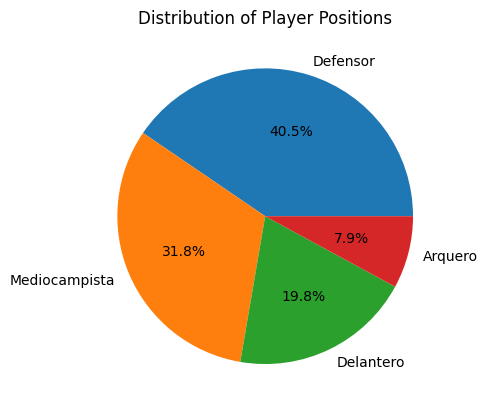

In [ ]:
positions = df_players['Posición general'].value_counts()
labels = positions.index.to_list()

plt.pie(positions, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Player Positions')
plt.show()

Los siguientes graficos muestran, en primera instancia contando las 'Otras Ligas' y luego sin, puesto que seguramente hay un desbalanceo de datos

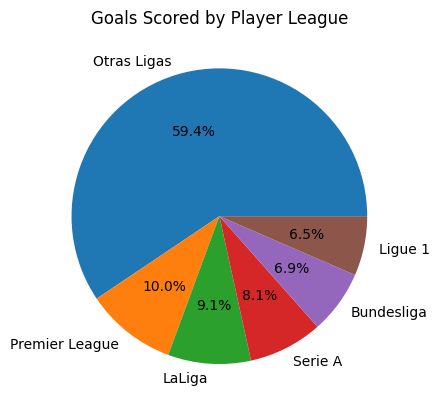

In [ ]:
Leagues = df_players['Liga'].value_counts()
labels = Leagues.index.to_list()

plt.pie(Leagues, labels=labels, autopct='%1.1f%%')
plt.title('Goals Scored by Player League') #Hay un desbalanceo de los datos seguramente
plt.show()

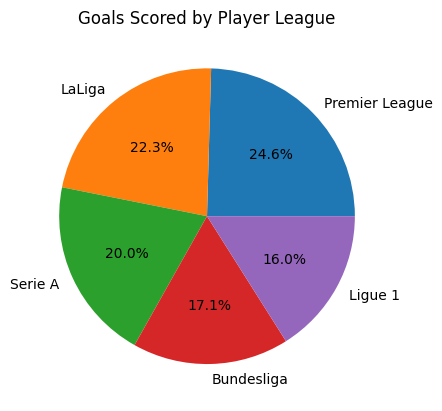

In [ ]:
df_filtered = df_players[df_players['Liga'] != 'Otras Ligas']
Leagues = df_filtered['Liga'].value_counts()
labels = Leagues.index.to_list()

plt.pie(Leagues, labels=labels, autopct='%1.1f%%')
plt.title('Goals Scored by Player League') #Hay un desbalanceo de los datos seguramente
plt.show()

<ipython-input-16-2b691e303246>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pie', y='Goles', data=df_players, palette='dark')


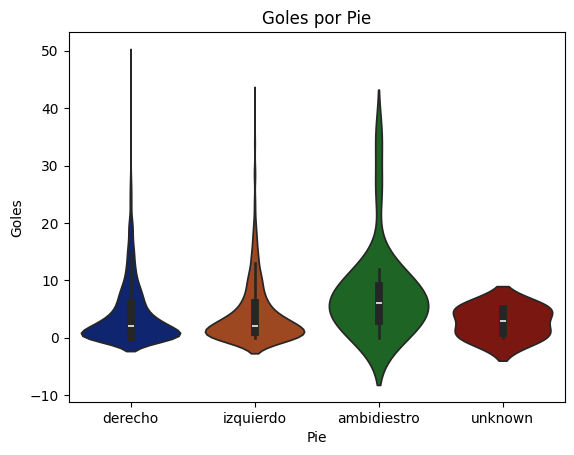

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Pie', y='Goles', data=df_players, palette='dark')
plt.title('Goles por Pie')
plt.show()

In [ ]:

df_top5 = df_players[df_players['Liga'] != 'Otras Ligas']


In [ ]:

df_top5 = df_top5.dropna(subset=['Liga'])


In [ ]:

# Selección de características relevantes
equipos_df = df_top5[['Jugador', 'Equipo durante el período seleccionado',
    'Goles', 'xG', 'Asistencias', 'xA', 'Goles/90', 'xG/90', 'Remates/90',
    'Tiros a la portería, %', 'Centros/90',
    'Precisión centros, %', 'Regates/90', 'Regates realizados, %', 'Duelos atacantes/90',
    'Duelos atacantes ganados, %', 'Toques en el área de penalti/90', 'Acciones defensivas realizadas/90', 'Duelos defensivos/90',
    'Duelos defensivos ganados, %', 'Duelos aéreos en los 90', 'Duelos aéreos ganados, %',
    'Entradas/90', 'Posesión conquistada después de una entrada',
    'Interceptaciones/90', 'Faltas/90', 'Tarjetas amarillas',
    'Tarjetas rojas',
    'Pases/90', 'Precisión pases, %', 'Pases hacia adelante/90', 'Pases cortos / medios /90',
    'Precisión pases cortos / medios, %', 'Pases largos/90', 'Precisión pases largos, %',
    'xA/90', 'Jugadas claves/90', 'Pases en el último tercio/90', 'Pases en profundidad/90',
    'Precisión pases en profundidad, %', 'Ataque en profundidad/90', 'Pases progresivos/90',
    'Faltas recibidas/90', 'Liga'
]]

equipos_df = equipos_df.rename(columns={'Equipo durante el período seleccionado': 'Equipo'})

equipos_df['Equipo'].unique()


array(['Almería', 'Arsenal', 'Aston Villa', 'Atalanta', 'Athletic Bilbao',
       'Atlético Madrid', 'Augsburg', 'Barcelona', 'Rennes',
       'Bayer Leverkusen', 'Bayern München', 'Rayo Vallecano', 'Bochum',
       'Manchester United', 'Bologna', 'Borussia Dortmund',
       "Borussia M'gladbach", 'Bournemouth', 'Brentford', 'Brighton',
       'Nice', 'Burnley', 'Cádiz', 'Cagliari', 'Sheffield United',
       'Heidenheim', 'Celta de Vigo', 'Chelsea', 'Clermont',
       'Crystal Palace', 'Eintracht Frankfurt', 'Empoli', 'Everton',
       'Fiorentina', 'Freiburg', 'Le Havre', 'Reims', 'Frosinone',
       'Fulham', 'Darmstadt 98', 'Genoa', 'Getafe', 'Girona', 'Granada',
       'Hoffenheim', 'Juventus', 'Köln', 'Las Palmas', 'Lazio', 'Lecce',
       'Lens', 'Lille', 'Liverpool', 'Lorient', 'Luton Town', 'Mainz 05',
       'Mallorca', 'Manchester City', 'Metz', 'Milan', 'Monaco',
       'Montpellier', 'Monza', 'Nantes', 'Napoli', 'Newcastle United',
       'Nottingham Forest', 'Osasuna', 'P

In [ ]:
# Agregar por equipo
equipos_agg = equipos_df.groupby('Equipo').agg({
    'Goles': 'sum',
    'xG': 'sum',
    'Asistencias': 'sum',
    'xA': 'sum',
    'Goles/90': 'mean',
    'xG/90': 'mean',
    'Remates/90': 'mean',
    'Tiros a la portería, %': 'mean',
    'Centros/90': 'mean',
    'Precisión centros, %': 'mean',
    'Regates/90': 'mean',
    'Regates realizados, %': 'mean',
    'Duelos atacantes/90': 'mean',
    'Duelos atacantes ganados, %': 'mean',
    'Acciones defensivas realizadas/90': 'mean',
    'Duelos defensivos/90': 'mean',
    'Duelos defensivos ganados, %': 'mean',
    'Duelos aéreos en los 90': 'mean',
    'Duelos aéreos ganados, %': 'mean',
    'Entradas/90': 'mean',
    'Posesión conquistada después de una entrada': 'mean',
    'Interceptaciones/90': 'mean',
    'Faltas/90': 'mean',
    'Tarjetas amarillas': 'sum',
    'Tarjetas rojas': 'sum',
    'Pases/90': 'mean',
    'Precisión pases, %': 'mean',
    'Pases hacia adelante/90': 'mean',
    'Pases cortos / medios /90': 'mean',
    'Precisión pases cortos / medios, %': 'mean',
    'Pases largos/90': 'mean',
    'Precisión pases largos, %': 'mean',
    'xA/90': 'mean',
    'Jugadas claves/90': 'mean',
    'Pases en el último tercio/90': 'mean',
    'Pases en profundidad/90': 'mean',
    'Precisión pases en profundidad, %': 'mean',
    'Ataque en profundidad/90': 'mean',
    'Pases progresivos/90': 'mean',
    'Faltas recibidas/90': 'mean'
}).reset_index()

equipos_agg


,Equipo,Goles,xG,Asistencias,xA,Goles/90,xG/90,Remates/90,"Tiros a la portería, %",Centros/90,...,Pases largos/90,"Precisión pases largos, %",xA/90,Jugadas claves/90,Pases en el último tercio/90,Pases en profundidad/90,"Precisión pases en profundidad, %",Ataque en profundidad/90,Pases progresivos/90,Faltas recibidas/90
0,Almería,22,31.90,15,19.25,0.072308,0.101538,0.998462,32.436923,1.196923,...,3.669231,53.930769,0.060769,0.213077,3.752308,0.584615,25.966154,0.362308,5.412308,1.169231
1,Arsenal,114,96.70,62,57.46,0.194375,0.168750,1.259375,31.803125,1.106250,...,2.773750,57.628750,0.091875,0.350625,4.741875,0.636875,36.987500,1.151250,5.268125,0.913125
2,Aston Villa,106,98.72,77,68.74,0.137778,0.133889,1.033889,35.641667,1.353889,...,3.074444,55.967222,0.096111,0.421667,4.106667,0.728889,33.714444,0.822222,5.281111,1.021111
3,Atalanta,93,85.56,60,56.83,0.166471,0.156471,1.082941,34.442941,1.162353,...,3.715294,58.311176,0.102353,0.405882,4.298824,0.364706,26.238824,0.780000,6.311765,0.791765
4,Athletic Bilbao,63,62.45,45,40.10,0.130625,0.132500,0.969375,32.167500,1.690625,...,3.273125,51.301875,0.086250,0.362500,4.845625,0.635000,24.242500,0.550000,5.817500,0.946875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Villarreal,61,57.73,47,39.72,0.119375,0.116250,0.928125,31.401875,1.061250,...,3.620625,57.521250,0.081250,0.312500,4.711875,0.536250,39.168125,0.691875,6.198750,1.101250
85,Werder Bremen,27,30.25,22,18.92,0.086364,0.099091,0.733636,26.355455,1.068182,...,4.809091,56.415455,0.061818,0.273636,4.248182,0.589091,39.410000,0.544545,7.090909,0.747273
86,West Ham United,86,72.17,45,45.06,0.140714,0.118571,0.856429,31.873571,1.004286,...,4.035714,56.874286,0.073571,0.235000,3.812143,0.407857,30.095714,0.402143,5.165000,0.814286
87,Wolfsburg,76,68.72,28,30.03,0.197857,0.187857,1.198571,38.344286,0.994286,...,3.492143,53.686429,0.077143,0.317857,4.129286,0.483571,37.231429,0.635000,5.667143,0.996429


In [ ]:
# prompt: agregar liga correspondiente a cada equipo a mi df

equipos_agg['Liga'] = equipos_agg['Equipo'].map(clubes_ligas)

equipos_agg


,Equipo,Goles,xG,Asistencias,xA,Goles/90,xG/90,Remates/90,"Tiros a la portería, %",Centros/90,...,"Precisión pases largos, %",xA/90,Jugadas claves/90,Pases en el último tercio/90,Pases en profundidad/90,"Precisión pases en profundidad, %",Ataque en profundidad/90,Pases progresivos/90,Faltas recibidas/90,Liga
0,Almería,22,31.90,15,19.25,0.072308,0.101538,0.998462,32.436923,1.196923,...,53.930769,0.060769,0.213077,3.752308,0.584615,25.966154,0.362308,5.412308,1.169231,LaLiga
1,Arsenal,114,96.70,62,57.46,0.194375,0.168750,1.259375,31.803125,1.106250,...,57.628750,0.091875,0.350625,4.741875,0.636875,36.987500,1.151250,5.268125,0.913125,Premier League
2,Aston Villa,106,98.72,77,68.74,0.137778,0.133889,1.033889,35.641667,1.353889,...,55.967222,0.096111,0.421667,4.106667,0.728889,33.714444,0.822222,5.281111,1.021111,Premier League
3,Atalanta,93,85.56,60,56.83,0.166471,0.156471,1.082941,34.442941,1.162353,...,58.311176,0.102353,0.405882,4.298824,0.364706,26.238824,0.780000,6.311765,0.791765,Serie A
4,Athletic Bilbao,63,62.45,45,40.10,0.130625,0.132500,0.969375,32.167500,1.690625,...,51.301875,0.086250,0.362500,4.845625,0.635000,24.242500,0.550000,5.817500,0.946875,LaLiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Villarreal,61,57.73,47,39.72,0.119375,0.116250,0.928125,31.401875,1.061250,...,57.521250,0.081250,0.312500,4.711875,0.536250,39.168125,0.691875,6.198750,1.101250,LaLiga
85,Werder Bremen,27,30.25,22,18.92,0.086364,0.099091,0.733636,26.355455,1.068182,...,56.415455,0.061818,0.273636,4.248182,0.589091,39.410000,0.544545,7.090909,0.747273,Bundesliga
86,West Ham United,86,72.17,45,45.06,0.140714,0.118571,0.856429,31.873571,1.004286,...,56.874286,0.073571,0.235000,3.812143,0.407857,30.095714,0.402143,5.165000,0.814286,Premier League
87,Wolfsburg,76,68.72,28,30.03,0.197857,0.187857,1.198571,38.344286,0.994286,...,53.686429,0.077143,0.317857,4.129286,0.483571,37.231429,0.635000,5.667143,0.996429,Bundesliga


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalización de datos
scaler = StandardScaler()
equipos_scaled = scaler.fit_transform(equipos_agg.drop(columns=['Equipo', 'Liga']))

# Guardar los nombres de los equipos para referencia
equipos_names = equipos_agg['Equipo']
equipos_ligas = equipos_agg['Liga']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

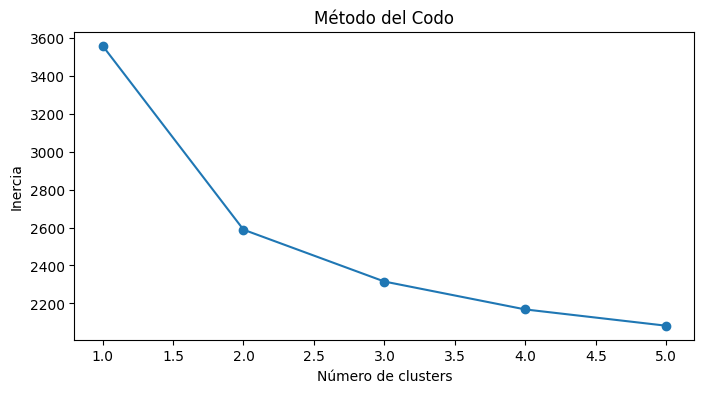

,Equipo,Goles,xG,Asistencias,xA,Goles/90,xG/90,Remates/90,"Tiros a la portería, %",Centros/90,...,"Precisión pases largos, %",xA/90,Jugadas claves/90,Pases en el último tercio/90,Pases en profundidad/90,"Precisión pases en profundidad, %",Ataque en profundidad/90,Pases progresivos/90,Faltas recibidas/90,Liga
0,Almería,22,31.90,15,19.25,0.072308,0.101538,0.998462,32.436923,1.196923,...,53.930769,0.060769,0.213077,3.752308,0.584615,25.966154,0.362308,5.412308,1.169231,LaLiga
1,Arsenal,114,96.70,62,57.46,0.194375,0.168750,1.259375,31.803125,1.106250,...,57.628750,0.091875,0.350625,4.741875,0.636875,36.987500,1.151250,5.268125,0.913125,Premier League
2,Aston Villa,106,98.72,77,68.74,0.137778,0.133889,1.033889,35.641667,1.353889,...,55.967222,0.096111,0.421667,4.106667,0.728889,33.714444,0.822222,5.281111,1.021111,Premier League
3,Atalanta,93,85.56,60,56.83,0.166471,0.156471,1.082941,34.442941,1.162353,...,58.311176,0.102353,0.405882,4.298824,0.364706,26.238824,0.780000,6.311765,0.791765,Serie A
4,Athletic Bilbao,63,62.45,45,40.10,0.130625,0.132500,0.969375,32.167500,1.690625,...,51.301875,0.086250,0.362500,4.845625,0.635000,24.242500,0.550000,5.817500,0.946875,LaLiga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Villarreal,61,57.73,47,39.72,0.119375,0.116250,0.928125,31.401875,1.061250,...,57.521250,0.081250,0.312500,4.711875,0.536250,39.168125,0.691875,6.198750,1.101250,LaLiga
85,Werder Bremen,27,30.25,22,18.92,0.086364,0.099091,0.733636,26.355455,1.068182,...,56.415455,0.061818,0.273636,4.248182,0.589091,39.410000,0.544545,7.090909,0.747273,Bundesliga
86,West Ham United,86,72.17,45,45.06,0.140714,0.118571,0.856429,31.873571,1.004286,...,56.874286,0.073571,0.235000,3.812143,0.407857,30.095714,0.402143,5.165000,0.814286,Premier League
87,Wolfsburg,76,68.72,28,30.03,0.197857,0.187857,1.198571,38.344286,0.994286,...,53.686429,0.077143,0.317857,4.129286,0.483571,37.231429,0.635000,5.667143,0.996429,Bundesliga


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(equipos_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1,6), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Mostrar resultados
equipos_agg


In [ ]:
# Seleccionar el número óptimo de clusters (e.g., 5)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
equipos_clusters = kmeans.fit_predict(equipos_scaled)
equipos_agg['Cluster'] = equipos_clusters

# Mostrar resultados
print(equipos_agg)

                     Equipo  Goles     xG  Asistencias     xA  Goles/90  \
0                   Almería     22  31.90           15  19.25  0.072308   
1                   Arsenal    114  96.70           62  57.46  0.194375   
2               Aston Villa    106  98.72           77  68.74  0.137778   
3                  Atalanta     93  85.56           60  56.83  0.166471   
4           Athletic Bilbao     63  62.45           45  40.10  0.130625   
..                      ...    ...    ...          ...    ...       ...   
84               Villarreal     61  57.73           47  39.72  0.119375   
85            Werder Bremen     27  30.25           22  18.92  0.086364   
86          West Ham United     86  72.17           45  45.06  0.140714   
87                Wolfsburg     76  68.72           28  30.03  0.197857   
88  Wolverhampton Wanderers     56  58.22           40  32.46  0.125000   

       xG/90  Remates/90  Tiros a la portería, %  Centros/90  ...     xA/90  \
0   0.101538    0.99

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
jugadores_df = pd.read_excel('/content/drive/MyDrive/Datos/IAA/ds_argentinos.xlsx')

In [ ]:
import pandas as pd

# Listas de clubes por liga
premier_league = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']
laliga = ['Almería', 'Athletic Bilbao', 'Atlético Madrid', 'Barcelona', 'Cádiz', 'Celta de Vigo', 'Getafe', 'Girona', 'Granada', 'Las Palmas', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Betis', 'Real Madrid', 'Real Sociedad', 'Sevilla', 'Valencia', 'Villarreal']
ligue1 = ['Clermont', 'Le Havre', 'Lens', 'Lille', 'Lorient', 'Lyon', 'Marseille', 'Metz', 'Monaco', 'Montpellier', 'Nantes', 'Nice', 'PSG', 'Reims', 'Rennes', 'Strasbourg', 'Toulouse']
serie_a = ['Atalanta', 'Bologna', 'Cagliari', 'Empoli', 'Fiorentina', 'Frosinone', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Lecce', 'Milan', 'Monza', 'Napoli', 'Roma', 'Salernitana', 'Sassuolo', 'Torino', 'Udinese', 'Verona']
bundesliga = ['Augsburg', 'Bayer Leverkusen', 'Bayern München', 'Bochum', 'Borussia Dortmund', 'Borussia M\'gladbach', 'Darmstadt 98', 'Eintracht Frankfurt', 'Freiburg', 'Heidenheim', 'Hoffenheim', 'Köln', 'Mainz 05', 'RB Leipzig', 'Union Berlin', 'Werder Bremen', 'Wolfsburg']

clubes_ligas = {}

# Asignar ligas a los clubes
for club in premier_league:
    clubes_ligas[club] = 'Premier League'
for club in laliga:
    clubes_ligas[club] = 'LaLiga'
for club in ligue1:
    clubes_ligas[club] = 'Ligue 1'
for club in serie_a:
    clubes_ligas[club] = 'Serie A'
for club in bundesliga:
    clubes_ligas[club] = 'Bundesliga'

# Listado completo de clubes proporcionado (se asume que estos clubes están en "Otras Ligas" si no están en las listas anteriores)
otros_clubes = [
    'AB', 'AEK Athens', 'AEK Larnaca', 'AGF', 'APOEL', 'ASD Asti', 'AZ', 'Aberdeen', 'Adana Demirspor', 'Ajax', 'Ajax II', 'Akademija Pandev', 'Akhmat Grozny', 'Al Ahli', 'Al Bukayriyah',
    'Al Duhail', 'Al Faisaly', 'Al Hilal', 'Al Ittihad', 'Al Khaleej', 'Al Nassr', 'Al Qadisiyah', 'Al Rayyan', 'Al Riyadh', 'Al Shabab', 'Al Shamal', 'Al Ta\'ee',
    'Alashkert', 'Albacete', 'Anderlecht', 'Ankaragücü', 'Antalyaspor', 'Antwerp', 'Apollon', 'Ararat-Armenia', 'Araz', 'Aris', 'Arouca', 'Arsenal Tivat', 'Ascoli', 'Astana', 'Atalanta U23',
    'Atlètic Club d\'Escaldes', 'Barcelona B', 'Basel', 'Basel II', 'BATE', 'Bala Town', 'Ballkani', 'Balzan', 'Baník Ostrava', 'Barcelona', 'Basel', 'Bayer Leverkusen U19', 'Bačka Topola',
    'Beitar Jerusalem', 'Benfica', 'Betis Deportivo', 'Beşiktaş', 'Birkirkara', 'Blackpool', 'Bnei Sakhnin', 'Bohemians 1905', 'Boluspor', 'Borac Banja Luka', 'Borussia Dortmund II',
    'Borussia Dortmund U19', 'Botev Plovdiv', 'Bournemouth U21', 'Brest', 'Bristol Rovers', 'Budućnost', 'CFR Cluj', 'CSKA 1948 Sofia', 'CSKA Sofia', 'Castellón', 'Celje', 'Celta de Vigo B',
    'Celtic', 'Cerdanyola del Vallès', 'Charleroi', 'Chaves', 'Cheltenham Town', 'Chindia Târgovişte', 'Chojniczanka Chojnice', 'Club Brugge', 'Club Tijuana', 'Coleraine', 'Como',
    'Connah\'s Quay', 'Cracovia Kraków', 'Crusaders', 'Crvena Zvezda', 'Crystal Palace U21', 'Cádiz B', 'DAC', 'Debrecen', 'Deportivo Alavés', 'Deportivo Alavés B', 'Differdange 03',
    'Dila', 'Dinamo Batumi', 'Dinamo City', 'Dinamo Zagreb', 'Dnipro-1', 'Domžale', 'Doxa', 'Drita', 'Dukagjini', 'Dundalk', 'Dundee', 'Dynamo Kyiv', 'Egnatia Rrogozhinë',
    'Eintracht Frankfurt U19', 'El Palo', 'Empoli U19', 'Energie Cottbus', 'Erzeni Shijak', 'Estrela Amadora', 'Excelsior', 'Exeter City', 'Eyüpspor', 'F91 Dudelange', 'FC Schaffhausen',
    'FCS Bucureşti', 'FH', 'Farul Constanţa', 'Fatih Karagümrük', 'Fehérvár', 'Fenerbahçe',  'Ferencváros', 'Feyenoord', 'Forest Green Rovers', 'Fortuna Düsseldorf', 'Fredericia', 'Freiburg II',
    'Fulham', 'Galatasaray', 'Gaziantep', 'Genk', 'Gent', 'Gil Vicente', 'Gjilani', 'Glentoran', 'Grasshopper', 'Gravina', 'Győri ETO', 'Gzira United', 'Górnik Zabrze', 'Göztepe',
    'Hajduk Split', 'Haka', 'Hamilton Academical', 'Hamrun Spartans', 'Hansa Rostock',  'Hapoel Afula', 'Hapoel Be\'er Sheva', 'Hapoel Hadera', 'Hapoel Jerusalem', 'Hapoel Ramat Gan',
    'Hatayspor', 'Haverfordwest County', 'Hearts', 'Heracles', 'Hertha BSC', 'Hibernian', 'Hillerød', 'Hoffenheim II', 'Hoffenheim U19', 'Honka', 'Huddersfield Town', 'Hull City',
    'Inter Club d\'Escaldes', 'Inter Turku', 'Internazionale U19', 'Ipswich Town', 'Iskra', 'Istra 1961', 'Juárez', 'Kalamata', 'Karmiotissa', 'Katowice', 'Kayserispor', 'Kecskeméti TE',
    'Kifissia', 'Kocaelispor', 'Kolding IF', 'Kolos Kovalivka', 'Kom', 'Kukësi', 'Lausanne Sport', 'LASK', 'LNZ Cherkasy', 'Larne', 'Lechia Gdańsk', 'Leganés', 'Legia Warszawa', 'Leicester City',
    'Levski Sofia', 'Liefering', 'Linfield', 'Liverpool U21', 'Livingston', 'Llapi', 'Ludogorets', 'Lugano', 'Maccabi Haifa', 'Maccabi Netanya', 'Maccabi Tel Aviv', 'Magpies', 'Makedonija GjP',
    'Mechelen', 'Metalist 1925 Kharkiv', 'Middlesbrough', 'Midtjylland', 'Milan U19', 'Milsami', 'Mladost DG', 'Mladost Novi Sad', 'Monterrey', 'Montpellier', 'Muaither', 'NEC', 'NKP Podhale',
    'Naft Al-Wasat', 'Neftchi', 'Nice', 'Noah', 'Nordsjælland', 'Næstved', 'OB', 'OFI', 'OH Leuven', 'Olimpija', 'Olympiacos Piraeus', 'Omonia Nicosia', 'Osasuna B', 'Osijek', 'PAOK', 'Panevėžys',
    'Pardubice', 'Paris', 'Partizan', 'Partizani Tirana', 'Pau', 'Pendikspor', 'Penybont', 'Petrocub', 'Petrolul 52', 'Piast Gliwice', 'Pisa', 'Podbeskidzie Bielsko-Biała', 'Pogoń Szczecin', 'Polissya',
    'Polonia Warszawa', 'Porto', 'Preston North End', 'Prishtina', 'Progrès Niederkorn', 'Pumas UNAM', 'Pyunik', 'Qabala', 'Qarabag', 'RFK Novi Sad', 'Raków Częstochowa', 'Randers', 'Rangers',
    'Rapid Bucureşti', 'Rapid Wien', 'Real Madrid Castilla', 'Real Sociedad B', 'Real Valladolid', 'Recreativo Granada', 'Rijeka', 'Riteriai', 'Rizespor', 'Roda JC', 'Rogaška', 'Roma U19',
    'Rostov', 'Rotherham United', 'Rubin Kazan', 'Sabah', 'Saint-Étienne', 'Samsunspor', 'Sandhausen', 'Santa Coloma', 'Santos Laguna', 'Sarajevo', 'Sassuolo U19', 'Sepsi', 'Servette',
    'Sevilla Atlético', 'Shakhtar Donetsk', 'Shakhtyor', 'Shamrock Rovers', 'Sheriff', 'Shkendija', 'Shkupi', 'Sion', 'Sivasspor', 'Slaven Belupo', 'Slavia Praha', 'Slavia Praha U19',
    'Slovan Bratislava', 'Southampton', 'Sparta Praha', 'Spartak Moskva', 'Spartak Trnava', 'Sporting Braga', 'Sporting Braga II', 'Sporting CP', 'Sporting CP II', 'St. Pauli', 'Stal Mielec',
    'Stoke City', 'Struga', 'Sturm Graz', 'Sturm Graz II', 'Stuttgart', 'Sutjeska', 'Swift Hesperange', 'Ternana', 'Teuta Durrës', 'The New Saints', 'Tikveš', 'Tirana', 'Trabzonspor',
    'Troyes', 'Træff', 'Turan-T', 'Twente', 'Union Saint-Gilloise', 'Universitatea Cluj', 'Universitatea Craiova', 'Urartu', 'Urartu II', 'Utrecht', 'Vaduz', 'Valencia Mestalla', 'Valenciennes',
    'Van', 'Velež', 'Vendsyssel', 'Viborg', 'Viktoria Plzeň', 'Villarreal B', 'Vitesse', 'Vitória Guimarães', 'Vitória Guimarães II', 'Vllaznia Shkodër', 'Vojvodina', 'Voluntari', 'Vorskla',
    'Voska Sport', 'Várda SE', 'Watford', 'West Bromwich Albion', 'Westerlo', 'Wigan Athletic', 'Wolfsburg U19', 'Wycombe Wanderers', 'Young Boys', 'Zagłębie Lubin', 'Zalaegerszegi TE',
    'Zemplín Michalovce', 'Zimbru', 'Zob Ahan', 'Zorya', 'Zrinjski', 'Zulte-Waregem', 'Zürich', 'Öster', 'Újpest', 'Čukarički', 'İstanbul Başakşehir', 'Široki Brijeg', 'Žalgiris', 'Željezničar', 'Žilina'
]

# Asignar "Otras Ligas" a los clubes que no están en las listas principales
for club in otros_clubes:
    if club not in clubes_ligas:
        clubes_ligas[club] = 'Otras Ligas'

# Asignar las ligas a los equipos en el DataFrame df_players
jugadores_df['Liga'] = jugadores_df['Equipo durante el período seleccionado'].map(clubes_ligas)

jugadores_df['Liga'].unique()


array(['Otras Ligas', nan, 'Premier League', 'Ligue 1', 'Serie A',
       'Bundesliga', 'LaLiga'], dtype=object)

In [ ]:
jugadores_df = jugadores_df[['Jugador', 'Equipo durante el período seleccionado',
    'Goles', 'xG', 'Asistencias', 'xA', 'Goles/90', 'xG/90', 'Remates/90',
    'Tiros a la portería, %', 'Centros/90',
    'Precisión centros, %', 'Regates/90', 'Regates realizados, %', 'Duelos atacantes/90',
    'Duelos atacantes ganados, %', 'Toques en el área de penalti/90', 'Acciones defensivas realizadas/90', 'Duelos defensivos/90',
    'Duelos defensivos ganados, %', 'Duelos aéreos en los 90', 'Duelos aéreos ganados, %',
    'Entradas/90', 'Posesión conquistada después de una entrada',
    'Interceptaciones/90', 'Faltas/90', 'Tarjetas amarillas',
    'Tarjetas rojas',
    'Pases/90', 'Precisión pases, %', 'Pases hacia adelante/90', 'Pases cortos / medios /90',
    'Precisión pases cortos / medios, %', 'Pases largos/90', 'Precisión pases largos, %',
    'xA/90', 'Jugadas claves/90', 'Pases en el último tercio/90', 'Pases en profundidad/90',
    'Precisión pases en profundidad, %', 'Ataque en profundidad/90', 'Pases progresivos/90',
    'Faltas recibidas/90', 'Liga'
]]

jugadores_df = jugadores_df.rename(columns={'Equipo durante el período seleccionado': 'Equipo'})



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que jugadores_df es tu DataFrame original con las columnas 'Jugador', 'Equipo', 'Liga' y otras características

# Guardar los nombres de los jugadores, equipos y ligas para referencia
jug_names = jugadores_df['Jugador']
jug_equipos_names = jugadores_df['Equipo']
jug_equipos_ligas = jugadores_df['Liga']

# Eliminar las columnas no numéricas para la normalización
jugadores_features = jugadores_df.drop(columns=['Jugador', 'Equipo', 'Liga'])

# Normalización de datos
scaler = StandardScaler()
jugadores_scaled = scaler.fit_transform(jugadores_features)

# Crear un DataFrame con los datos normalizados
jugadores_scaled_df = pd.DataFrame(jugadores_scaled, columns=jugadores_features.columns)

# Añadir las columnas no numéricas nuevamente
jugadores_scaled_df['Jugador'] = jug_names
jugadores_scaled_df['Equipo'] = jug_equipos_names
jugadores_scaled_df['Liga'] = jug_equipos_ligas

# Mostrar el DataFrame resultante
print(jugadores_scaled_df.head())



      Goles        xG  Asistencias        xA  Goles/90     xG/90  Remates/90  \
0 -0.187715  0.149100    -0.646960  0.200760 -0.581528 -0.551043   -0.428929   
1 -0.591436 -0.355038     0.950888  1.869667 -0.735313 -0.732471   -0.833315   
2 -0.591436 -0.093803    -0.646960 -0.262826 -0.735313 -0.641757   -0.820678   
3  7.482990  7.752420     8.940128  9.676446  2.571072  2.623938    2.452320   
4  0.216007  0.767815     1.749812  1.990200 -0.427742 -0.278902    0.228198   

   Tiros a la portería, %  Centros/90  Precisión centros, %  ...  \
0               -0.412235   -0.481365              0.197343  ...   
1               -0.502003    1.174972             -0.208527  ...   
2                0.248133   -1.006145             -1.247091  ...   
3                0.719892    0.256607              0.159837  ...   
4               -0.427038   -0.612560              0.985419  ...   

   Jugadas claves/90  Pases en el último tercio/90  Pases en profundidad/90  \
0          -0.700840           

In [ ]:
from sklearn.cluster import KMeans

# Supongamos que `kmeans` es el modelo KMeans ajustado con los datos de equipos
# Asegúrate de usar las mismas características seleccionadas para la normalización y clustering
caracteristicas_usadas = ['Goles', 'xG', 'Asistencias', 'xA', 'Goles/90', 'xG/90',
       'Remates/90', 'Tiros a la portería, %', 'Centros/90',
       'Precisión centros, %', 'Regates/90', 'Regates realizados, %',
       'Duelos atacantes/90', 'Duelos atacantes ganados, %',
       'Acciones defensivas realizadas/90', 'Duelos defensivos/90',
       'Duelos defensivos ganados, %', 'Duelos aéreos en los 90',
       'Duelos aéreos ganados, %', 'Entradas/90',
       'Posesión conquistada después de una entrada', 'Interceptaciones/90',
       'Faltas/90', 'Tarjetas amarillas', 'Tarjetas rojas', 'Pases/90',
       'Precisión pases, %', 'Pases hacia adelante/90',
       'Pases cortos / medios /90', 'Precisión pases cortos / medios, %',
       'Pases largos/90', 'Precisión pases largos, %', 'xA/90',
       'Jugadas claves/90', 'Pases en el último tercio/90',
       'Pases en profundidad/90', 'Precisión pases en profundidad, %',
       'Ataque en profundidad/90', 'Pases progresivos/90',
       'Faltas recibidas/90']


In [ ]:

# Predecir el cluster para cada jugador joven argentino
jugadores_clusters = kmeans.predict(jugadores_scaled_df[caracteristicas_usadas])
jugadores_scaled_df['Cluster'] = jugadores_clusters

# Añadir las columnas no numéricas nuevamente
jugadores_scaled_df['Jugador'] = jug_names
jugadores_scaled_df['Equipo'] = jug_equipos_names
jugadores_scaled_df['Liga'] = jug_equipos_ligas

# Mostrar el DataFrame resultante con los clusters asignados
print(jugadores_scaled_df.head())

# Verificar los clusters únicos asignados
print("Clusters únicos asignados:", jugadores_scaled_df['Cluster'].unique())


      Goles        xG  Asistencias        xA  Goles/90     xG/90  Remates/90  \
0 -0.187715  0.149100    -0.646960  0.200760 -0.581528 -0.551043   -0.428929   
1 -0.591436 -0.355038     0.950888  1.869667 -0.735313 -0.732471   -0.833315   
2 -0.591436 -0.093803    -0.646960 -0.262826 -0.735313 -0.641757   -0.820678   
3  7.482990  7.752420     8.940128  9.676446  2.571072  2.623938    2.452320   
4  0.216007  0.767815     1.749812  1.990200 -0.427742 -0.278902    0.228198   

   Tiros a la portería, %  Centros/90  Precisión centros, %  ...  \
0               -0.412235   -0.481365              0.197343  ...   
1               -0.502003    1.174972             -0.208527  ...   
2                0.248133   -1.006145             -1.247091  ...   
3                0.719892    0.256607              0.159837  ...   
4               -0.427038   -0.612560              0.985419  ...   

   Precisión pases en profundidad, %  Ataque en profundidad/90  \
0                          -0.298027        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


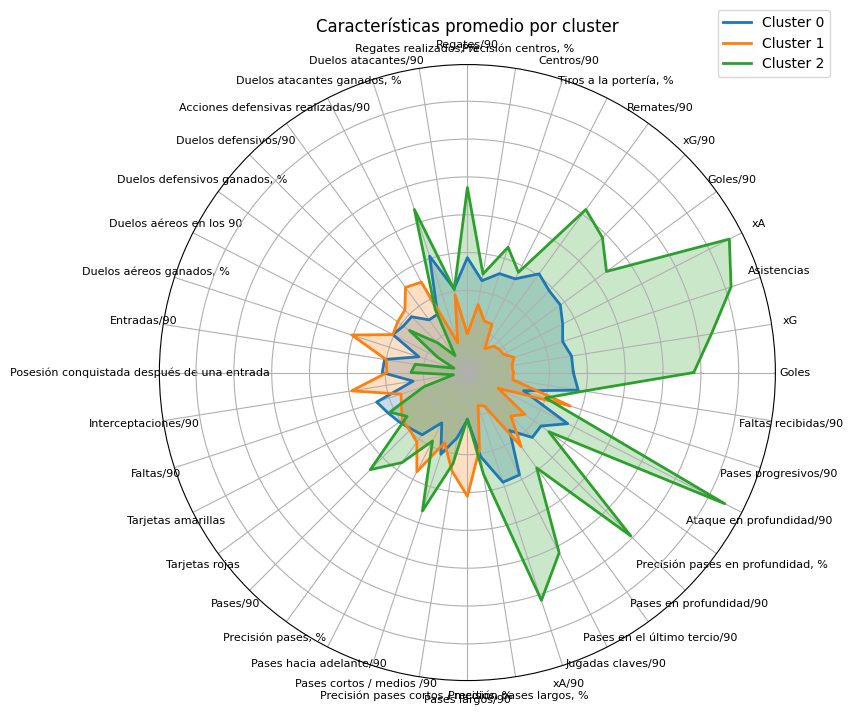

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calcular la media de las características para cada cluster
cluster_means = jugadores_scaled_df.groupby('Cluster')[caracteristicas_usadas].mean()

# Número de variables
num_vars = len(caracteristicas_usadas)

# Ángulos para el radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# La primera característica se repite para cerrar el círculo
angles += angles[:1]

# Radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibuja una línea para cada cluster
for i, row in cluster_means.iterrows():
    data = row.tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, data, alpha=0.25)

# Añadir etiquetas
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(caracteristicas_usadas, fontsize=8)

# Añadir leyenda
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title('Características promedio por cluster')
plt.show()


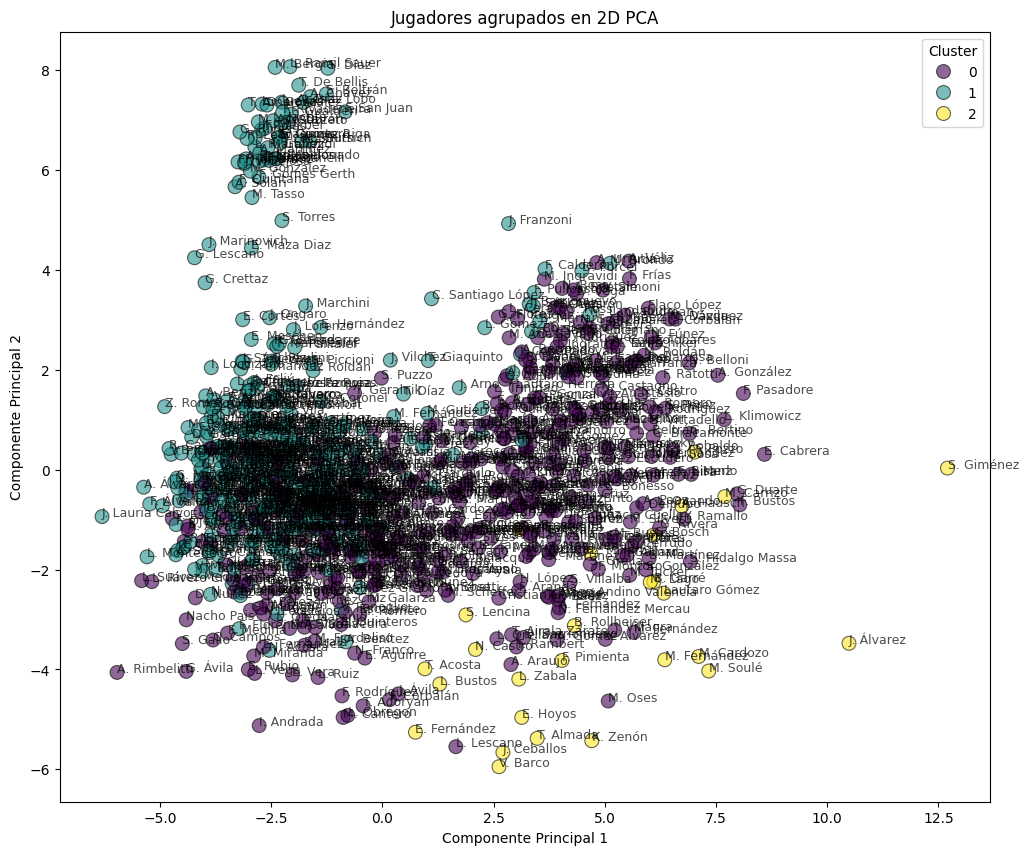

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(jugadores_scaled_df[caracteristicas_usadas])

# Añadir las componentes principales al DataFrame
jugadores_scaled_df['PCA1'] = pca_result[:, 0]
jugadores_scaled_df['PCA2'] = pca_result[:, 1]

# Visualización del gráfico de dispersión
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=jugadores_scaled_df, palette='viridis', s=100, alpha=0.6, edgecolor='k')

# Añadir etiquetas
for i in range(jugadores_scaled_df.shape[0]):
    plt.text(jugadores_scaled_df['PCA1'][i], jugadores_scaled_df['PCA2'][i], jugadores_scaled_df['Jugador'][i], fontsize=9, alpha=0.7)

plt.title('Jugadores agrupados en 2D PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# prompt: quiero saber qué equipos están en cada cluster. mi df es Equipos_scaled

# Obtener los clusters únicos
clusters = equipos_agg['Cluster'].unique()

# Iterar sobre cada cluster
for cluster in clusters:
  # Filtrar equipos por cluster
  equipos_en_cluster = equipos_agg[equipos_agg['Cluster'] == cluster]

  # Obtener nombres de equipos
  nombres_equipos = equipos_en_cluster['Equipo'].tolist()

  # Imprimir información
  print(f"Cluster {cluster}:")
  print(f"  Equipos: {nombres_equipos}")
  print(f"  Número de equipos: {len(nombres_equipos)}")
  print()


Cluster 1:
  Equipos: ['Almería', 'Augsburg', 'Bochum', "Borussia M'gladbach", 'Bournemouth', 'Burnley', 'Cagliari', 'Celta de Vigo', 'Clermont', 'Crystal Palace', 'Cádiz', 'Darmstadt 98', 'Empoli', 'Everton', 'Frosinone', 'Genoa', 'Getafe', 'Granada', 'Heidenheim', 'Köln', 'Las Palmas', 'Le Havre', 'Lecce', 'Lorient', 'Luton Town', 'Mainz 05', 'Mallorca', 'Metz', 'Montpellier', 'Monza', 'Nantes', 'Nottingham Forest', 'Osasuna', 'Rayo Vallecano', 'Reims', 'Salernitana', 'Sassuolo', 'Sevilla', 'Sheffield United', 'Strasbourg', 'Torino', 'Udinese', 'Union Berlin', 'Valencia', 'Werder Bremen']
  Número de equipos: 45

Cluster 2:
  Equipos: ['Arsenal', 'Aston Villa', 'Barcelona', 'Bayer Leverkusen', 'Bayern München', 'Chelsea', 'Liverpool', 'Manchester City', 'PSG', 'Real Madrid']
  Número de equipos: 10

Cluster 0:
  Equipos: ['Atalanta', 'Athletic Bilbao', 'Atlético Madrid', 'Bologna', 'Borussia Dortmund', 'Brentford', 'Brighton', 'Eintracht Frankfurt', 'Fiorentina', 'Freiburg', 'Fulham'